In [142]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import json
import seaborn as sns
from mido import MidiFile, tick2second
import data_processing
import data_processing.plot_midi
from data_processing.tokenize_midi import tokenize_basic_vocab
from data_processing.decoding import decode_to_tokens_basic_vocab, decode_to_tokens_basic_vocab
import importlib
import data_processing.plot_midi
importlib.reload(data_processing.plot_midi)
from data_processing.plot_midi import plot_midi

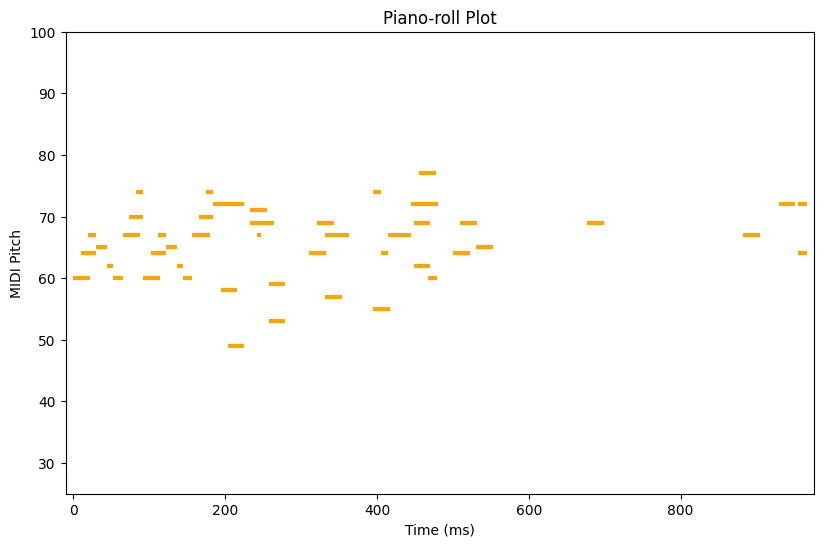

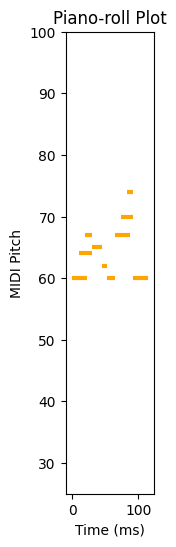

In [153]:
file = MidiFile("c0a7b59ac24b8e0dbc4df9a61cee7e11.mid")
file = MidiFile("good_inputcheated.mid")
token_sequence = decode_to_tokens_basic_vocab(tokenize_basic_vocab(file))
seed_tokens = token_sequence[:200]

plot_midi(token_sequence, scale=0.05, y_range=[25,100])
plot_midi(token_sequence[:50], scale=0.05, y_range=[25,100])

53


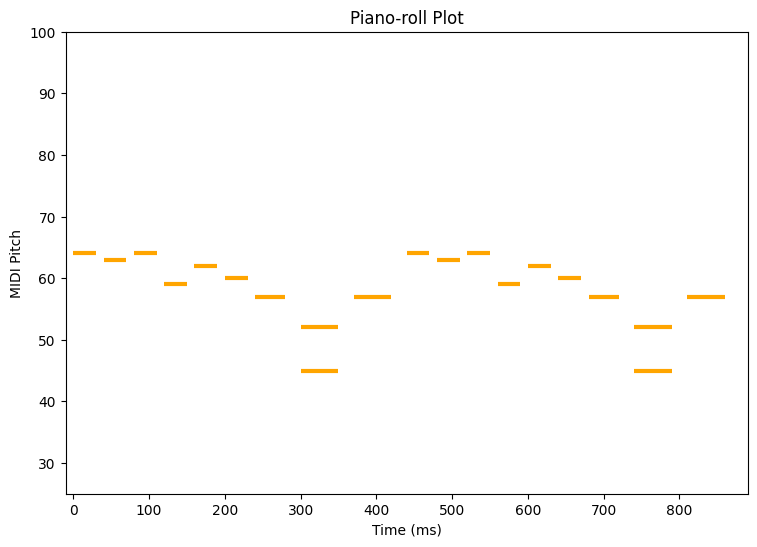

In [ ]:
seed_prompt = [
    "NOTE_ON_60", "NOTE_ON_64", "NOTE_ON_67",
    "VELOCITY_16", "TIME_SHIFT_100ms",  
    "NOTE_OFF_60", "NOTE_OFF_64", "NOTE_OFF_67", "TIME_SHIFT_50ms",
    
    "NOTE_ON_62", "NOTE_ON_66", "NOTE_ON_69",
    "VELOCITY_16", "TIME_SHIFT_100ms",
    "NOTE_OFF_62", "NOTE_OFF_66", "NOTE_OFF_69",  "TIME_SHIFT_50ms",
    
    "NOTE_ON_60", "NOTE_ON_64", "NOTE_ON_67",
    "VELOCITY_16", "TIME_SHIFT_100ms",
    "NOTE_OFF_60", "NOTE_OFF_64", "NOTE_OFF_67",  "TIME_SHIFT_50ms",

    "NOTE_ON_62", "NOTE_ON_66", "NOTE_ON_69",
    "VELOCITY_16", "TIME_SHIFT_100ms",
    "NOTE_OFF_62", "NOTE_OFF_66", "NOTE_OFF_69",  "TIME_SHIFT_50ms",

    "NOTE_ON_60", "NOTE_ON_64", "NOTE_ON_67",
    "VELOCITY_16", "TIME_SHIFT_100ms",
    "NOTE_OFF_60", "NOTE_OFF_64", "NOTE_OFF_67",  "TIME_SHIFT_50ms",

    "NOTE_ON_62", "NOTE_ON_66", "NOTE_ON_69",
    "VELOCITY_16", "TIME_SHIFT_100ms",
    "NOTE_OFF_62", "NOTE_OFF_66", "NOTE_OFF_69",  
]

seed_prompt2 = [
    # C Major (Quick arpeggiation)
    "NOTE_ON_60", "VELOCITY_22", "TIME_SHIFT_40ms",
    "NOTE_ON_64", "VELOCITY_22", "TIME_SHIFT_40ms",
    "NOTE_ON_67", "VELOCITY_22", "TIME_SHIFT_40ms",
    "NOTE_OFF_60", "NOTE_OFF_64", "NOTE_OFF_67", "TIME_SHIFT_30ms",

    # D Minor (Quick arpeggiation)
    "NOTE_ON_62", "VELOCITY_24", "TIME_SHIFT_35ms",
    "NOTE_ON_65", "VELOCITY_24", "TIME_SHIFT_35ms",
    "NOTE_ON_69", "VELOCITY_24", "TIME_SHIFT_35ms",
    "NOTE_OFF_62", "NOTE_OFF_65", "NOTE_OFF_69", "TIME_SHIFT_30ms",

    # G Major (Chord stab)
    "NOTE_ON_55", "NOTE_ON_59", "NOTE_ON_62",
    "VELOCITY_26", "TIME_SHIFT_50ms",
    "NOTE_OFF_55", "NOTE_OFF_59", "NOTE_OFF_62", "TIME_SHIFT_25ms",

    # A Minor (Quick roll-in)
    "NOTE_ON_57", "VELOCITY_20", "TIME_SHIFT_30ms",
    "NOTE_ON_60", "VELOCITY_22", "TIME_SHIFT_30ms",
    "NOTE_ON_64", "VELOCITY_24", "TIME_SHIFT_30ms",
    "NOTE_ON_69", "VELOCITY_26", "TIME_SHIFT_40ms",
    "NOTE_OFF_57", "NOTE_OFF_60", "NOTE_OFF_64", "NOTE_OFF_69", "TIME_SHIFT_20ms",

    # F Major (Fast, staggered entry)
    "NOTE_ON_53", "VELOCITY_25", "TIME_SHIFT_20ms",
    "NOTE_ON_57", "VELOCITY_25", "TIME_SHIFT_20ms",
    "NOTE_ON_60", "VELOCITY_25", "TIME_SHIFT_20ms",
    "NOTE_OFF_53", "NOTE_OFF_57", "NOTE_OFF_60", "TIME_SHIFT_30ms",

    # Quick repeat of G Major with variation
    "NOTE_ON_55", "NOTE_ON_59", "NOTE_ON_62",
    "VELOCITY_28", "TIME_SHIFT_40ms",
    "NOTE_OFF_55", "NOTE_OFF_59", "NOTE_OFF_62", "TIME_SHIFT_20ms",

    # C Major (Short sustain)
    "NOTE_ON_60", "NOTE_ON_64", "NOTE_ON_67",
    "VELOCITY_30", "TIME_SHIFT_70ms",
    "NOTE_OFF_60", "NOTE_OFF_64", "NOTE_OFF_67", "TIME_SHIFT_20ms",

    # A Minor (Fast syncopation)
    "NOTE_ON_57", "NOTE_ON_60", "NOTE_ON_64",
    "VELOCITY_28", "TIME_SHIFT_40ms",
    "NOTE_OFF_57", "NOTE_OFF_60", "NOTE_OFF_64", "TIME_SHIFT_30ms",

    # G Major (Shorter, more punchy)
    "NOTE_ON_55", "NOTE_ON_59", "NOTE_ON_62",
    "VELOCITY_30", "TIME_SHIFT_50ms",
    "NOTE_OFF_55", "NOTE_OFF_59", "NOTE_OFF_62", "TIME_SHIFT_25ms",

    # Fast ending with C Major
    "NOTE_ON_60", "NOTE_ON_64", "NOTE_ON_67",
    "VELOCITY_32", "TIME_SHIFT_40ms",
    "NOTE_OFF_60", "NOTE_OFF_64", "NOTE_OFF_67", "TIME_SHIFT_20ms",
]


seed_prompt3 = [
    # Opening motif (E - D# - E)
    "NOTE_ON_64", "VELOCITY_26", "TIME_SHIFT_30ms",
    "NOTE_OFF_64", "TIME_SHIFT_10ms",
    "NOTE_ON_63", "VELOCITY_26", "TIME_SHIFT_30ms",
    "NOTE_OFF_63", "TIME_SHIFT_10ms",
    "NOTE_ON_64", "VELOCITY_26", "TIME_SHIFT_30ms",
    "NOTE_OFF_64", "TIME_SHIFT_10ms",

    # B - D - C - A
    "NOTE_ON_59", "VELOCITY_26", "TIME_SHIFT_30ms",
    "NOTE_OFF_59", "TIME_SHIFT_10ms",
    "NOTE_ON_62", "VELOCITY_26", "TIME_SHIFT_30ms",
    "NOTE_OFF_62", "TIME_SHIFT_10ms",
    "NOTE_ON_60", "VELOCITY_26", "TIME_SHIFT_30ms",
    "NOTE_OFF_60", "TIME_SHIFT_10ms",
    "NOTE_ON_57", "VELOCITY_26", "TIME_SHIFT_40ms",
    "NOTE_OFF_57", "TIME_SHIFT_20ms",

    # Accompanying bass (A-E-A)
    "NOTE_ON_45", "NOTE_ON_52", "VELOCITY_22", "TIME_SHIFT_50ms",
    "NOTE_OFF_45", "NOTE_OFF_52", "TIME_SHIFT_20ms",
    "NOTE_ON_57", "VELOCITY_22", "TIME_SHIFT_50ms",
    "NOTE_OFF_57", "TIME_SHIFT_20ms",

    # Return to motif (E - D# - E)
    "NOTE_ON_64", "VELOCITY_28", "TIME_SHIFT_30ms",
    "NOTE_OFF_64", "TIME_SHIFT_10ms",
    "NOTE_ON_63", "VELOCITY_28", "TIME_SHIFT_30ms",
    "NOTE_OFF_63", "TIME_SHIFT_10ms",
    "NOTE_ON_64", "VELOCITY_28", "TIME_SHIFT_30ms",
    "NOTE_OFF_64", "TIME_SHIFT_10ms",

    # B - D - C - A variation
    "NOTE_ON_59", "VELOCITY_28", "TIME_SHIFT_30ms",
    "NOTE_OFF_59", "TIME_SHIFT_10ms",
    "NOTE_ON_62", "VELOCITY_28", "TIME_SHIFT_30ms",
    "NOTE_OFF_62", "TIME_SHIFT_10ms",
    "NOTE_ON_60", "VELOCITY_28", "TIME_SHIFT_30ms",
    "NOTE_OFF_60", "TIME_SHIFT_10ms",
    "NOTE_ON_57", "VELOCITY_28", "TIME_SHIFT_40ms",
    "NOTE_OFF_57", "TIME_SHIFT_20ms",

    # Bass accompaniment repeats
    "NOTE_ON_45", "NOTE_ON_52", "VELOCITY_24", "TIME_SHIFT_50ms",
    "NOTE_OFF_45", "NOTE_OFF_52", "TIME_SHIFT_20ms",
    "NOTE_ON_57", "VELOCITY_24", "TIME_SHIFT_50ms",
    "NOTE_OFF_57", "TIME_SHIFT_20ms",
]

print(len(seed_prompt))
plot_midi(seed_prompt3, scale=1.0, y_range=[25,100])
